# Profitable Play Store App Recommendation

The aim of this project is to find mobile app categories that are likely to be most profitable for Google Play markets. This project is meant an imaginery company that is interested in building free mobile apps. Owing to the fact that ads are the major source of revenue for free apps, our dream company needs to develop only apps that can appeal to as many people as possible.

The data used for this project contains 10841 rows and 13 columns and can be assessed [here](https://www.kaggle.com/lava18/google-play-store-apps) on kaggle.

# DATA EXPLORATION

In [644]:
#import required library and files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Show all columns
#pd.options.display.max_columns

#load data
data = pd.read_csv("googleplaystore.csv")



# Column Description
- App : Application name
- Category : Category the app belongs to
- Rating : Overall user rating of the app (as when scraped)
- Reviews : Number of user reviews for the app (as when scraped)
- Size : Size of the app (as when scraped)
- Installs : Number of user downloads/installs for the app (as when scraped)
- Type : Paid or Free
- Price : Price of the app (as when scraped)
- Content Rating : Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres : An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- Last Updated : Date when the app was last updated on Play Store (as when scraped)
- Current Ver : Current version of the app available on Play Store (as when scraped)
- Android Ver : Min required Android version (as when scraped)

In [645]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


We can see that the google play data set has 10841 entries and 13 columns. To read more about the description for the columns visit [here](https://www.kaggle.com/lava18/google-play-store-apps)

# Selecting Columns
We need to exclude some columns that are not very helpful for our purpose. The "Price" and "Price" columns seem to convey the same information. Since we are working with free apps, the "Type" column contains either "Free", "Paid" values which is very useful for selecting our apps, we will work with the "Type" column and exclude the "Price" column. 

We will be excluding the "Genres" column. This is because in google play store, categories are more descriptive of the app groups. This is also not too harmful considering the fact that the "Genres" and the "App" columns contain almost the same value. The "Content Rating" column describes the age group the app is meant for. As we are not interested in segmenting the apps by age group, we will drop this column. 
We will also exclude Size, "Last Updated", "Current Ver", "Android Ver" columns.


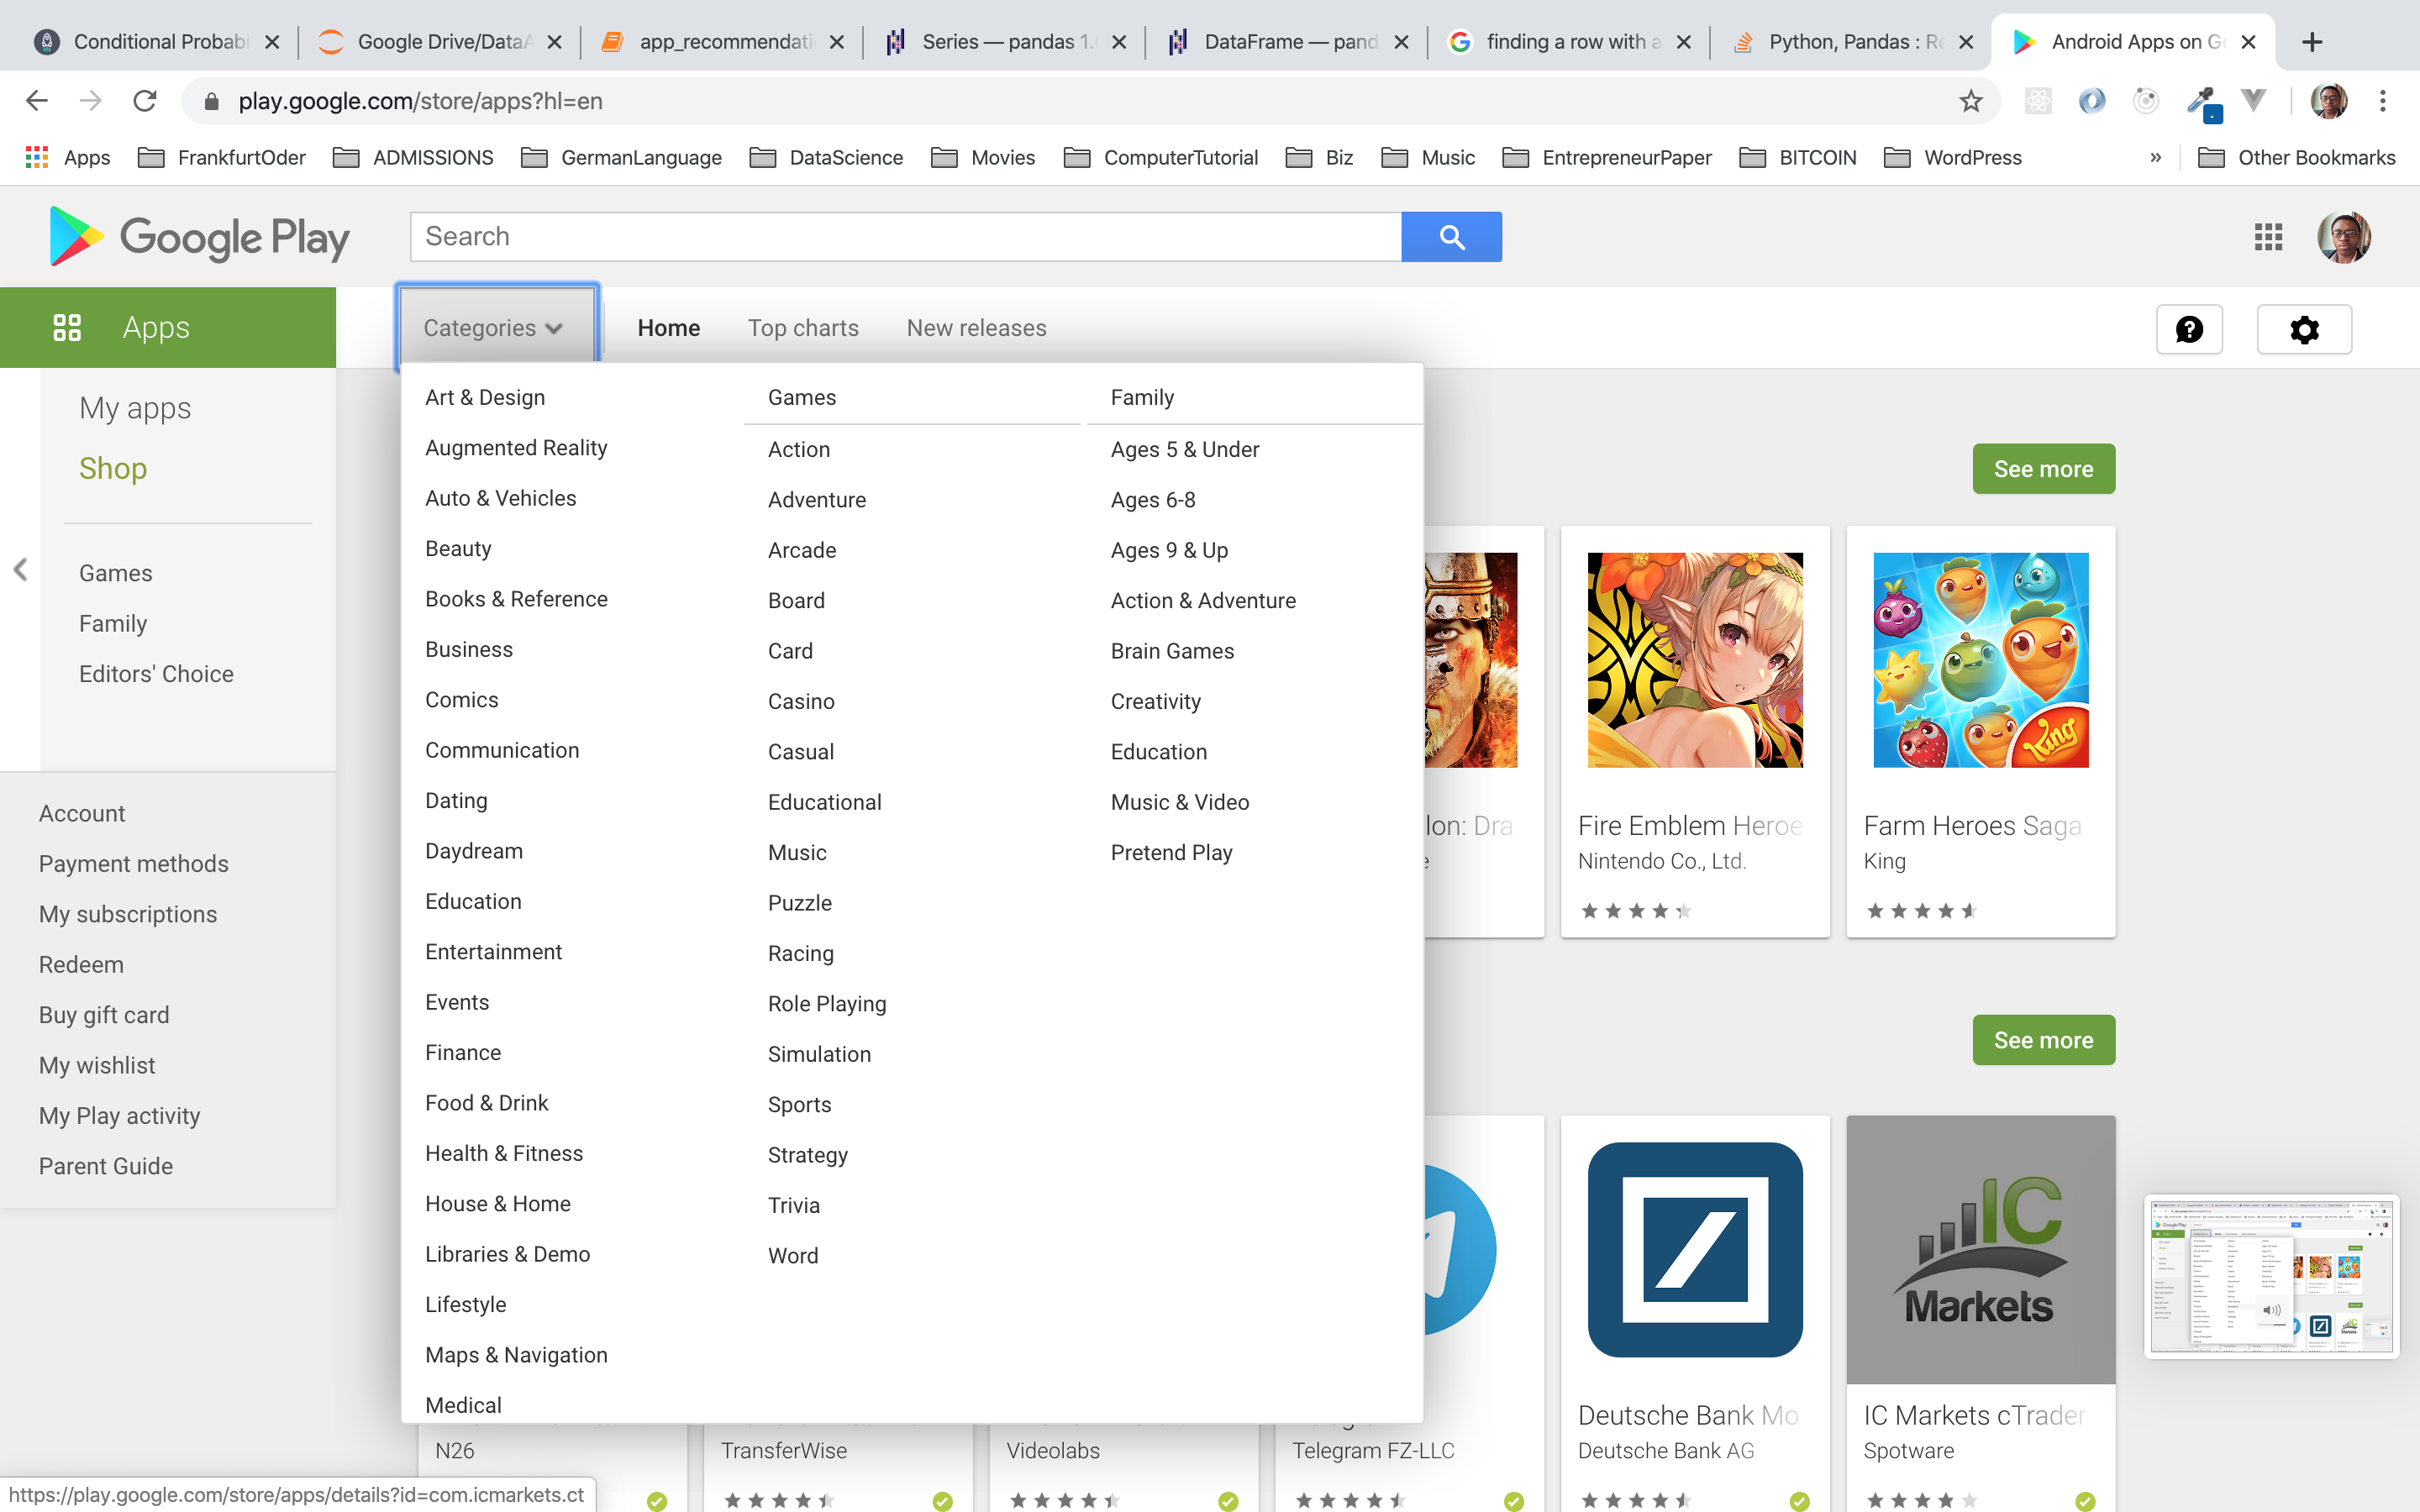

For the purpose of our analysis, it seems like 4 columns are most helpful for our analysis. The columns include: App, Category, Reviews,Installs. Let's go ahead and select those columns.

In [646]:
#selected  columns
data_selected = data[["App","Category","Reviews","Installs","Type"]].copy()

 # Data Cleaning
 
As with most datasets, there are noticeable inconsistencies in our dat that requires cleaning. To begin with, we need to handle row 10472 that has missing category which made its other values to be shifted to the left.

In [647]:
def find_app(app,data):
    """
    description: Searches and returns an app
    
    Args:
        app (string) : App to be returned
        data (Dataframe): App Dataframe
        
    Output:
        app (Series Object): The App
    """
    return data[data["App"] == app]


#A row with misplaced values
find_app("Life Made WI-Fi Touchscreen Photo Frame",data_selected)

,App,Category,Reviews,Installs,Type
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,3.0M,Free,0


A Search from google play store on "Life Made WI-Fi Touchscreen Photo Frame" returned the following:
 - App = "Life Made WI-Fi Touchscreen Photo Frame"
- category = "GAME"
- reviews = 1.9
- installs = "500+"
- type_ = "Free"
- price = 0
- c_rating = "Everyone"
- genres = None

We found that this app belongs to the GAME category. To be fair to other apps, we will only update the category value of the missing app while retaining the values of other columns as of 2018. 

In [648]:
updated_10472 = {"App":"Life Made WI-Fi Touchscreen Photo Frame",
                  "Category":"GAME",
                "Reviews":1.9,
                "Installs":"1,000+",
                "Type":"Free",
                "Price":0,
                "Content Rating": "Everyone",
                "Genres":np.nan}

updated_10472
#correct the missing values in row 10472
data_selected.replace(data_selected.iloc[10472], updated_10472, inplace=True)
find_app("Life Made WI-Fi Touchscreen Photo Frame",data_selected)

,App,Category,Reviews,Installs,Type
10472,Life Made WI-Fi Touchscreen Photo Frame,GAME,1.9,"1,000+",Free


Since we are interested in free apps, lets select only apps that are free and drop the rest.

In [649]:
#select only free apps
free_apps = data_selected[data_selected["Type"] == "Free"].copy()
free_apps.shape

(10040, 5)

# Removing Duplicate Entries
One of the issues we are to deal with include removing duplicate apps. There are about 1135 apps with duplicates. As we trying to make recommendation for individual apps, it is important to ensure that no App occured more than once in our record. 

In [650]:
duplicated_bool = free_apps.duplicated("App")
duplicated_bool.sum()

1135

Let's explore three of the apps that were repeated to determine how to remove the duplicates.

In [651]:
#find an app
def find_app(app,data):
    return data[data["App"] == app]

In [652]:
find_app("ROBLOX",free_apps)

,App,Category,Reviews,Installs,Type
1653,ROBLOX,GAME,4447388,"100,000,000+",Free
1701,ROBLOX,GAME,4447346,"100,000,000+",Free
1748,ROBLOX,GAME,4448791,"100,000,000+",Free
1841,ROBLOX,GAME,4449882,"100,000,000+",Free
1870,ROBLOX,GAME,4449910,"100,000,000+",Free
2016,ROBLOX,FAMILY,4449910,"100,000,000+",Free
2088,ROBLOX,FAMILY,4450855,"100,000,000+",Free
2206,ROBLOX,FAMILY,4450890,"100,000,000+",Free
4527,ROBLOX,FAMILY,4443407,"100,000,000+",Free


In [653]:
find_app("Instagram",free_apps)

,App,Category,Reviews,Installs,Type
2545,Instagram,SOCIAL,66577313,"1,000,000,000+",Free
2604,Instagram,SOCIAL,66577446,"1,000,000,000+",Free
2611,Instagram,SOCIAL,66577313,"1,000,000,000+",Free
3909,Instagram,SOCIAL,66509917,"1,000,000,000+",Free


In [654]:
find_app("8 Ball Pool",free_apps)

,App,Category,Reviews,Installs,Type
1675,8 Ball Pool,GAME,14198297,"100,000,000+",Free
1703,8 Ball Pool,GAME,14198602,"100,000,000+",Free
1755,8 Ball Pool,GAME,14200344,"100,000,000+",Free
1844,8 Ball Pool,GAME,14200550,"100,000,000+",Free
1871,8 Ball Pool,GAME,14201891,"100,000,000+",Free
1970,8 Ball Pool,GAME,14201604,"100,000,000+",Free
3953,8 Ball Pool,SPORTS,14184910,"100,000,000+",Free


Looking at the columns of the above three apps examined, one of the things noticeable is that some apps have two categories. For instance, Roblox belongs to Game and Family Category while "8 Ball Pool" belongs to both Game and Sports category. This cannot be as it is the same app. To resolve this issue, we will be replacing the categories of the duplicated apps with the most frequent value. 

For excluding the duplicates, the "Reviews" column looks interesting. The variable figures in the "Reviews" columns show that each entry was made at a different time. In order to get our single entry, we could take the average of all the review entries or select the entry with the highest reviews. We will go with the second option. 
Let's get and set the most frequent category first.

In [655]:
#Unique List of duplicated apps
duplicated_apps = free_apps[duplicated_bool]["App"].unique()

#def set_most_occured(df):
    #for k, row in df.iterrows():
       # for app in duplicated_apps:
         #   if row["App"] == app:
             #   app_df = find_app(app,df)
              #  most_occured_cat = get_most_occured(app_df["Category"])
                #row["Category"] = "GAME"
              #  row["Category"] = most_occured_cat
    #return df
#df_rob = set_most_occured(data_selected)
#find_app("8 Ball Pool",df_rob)

from collections import Counter

def set_most_occured(df):
    for k, row in df.iterrows():
        for app in duplicated_apps:
            if row["App"] == app:
                app_cats = find_app(app,df)["Category"]
                if len(set(app_cats)) > 1:
                    most_occured_cat = Counter(app_cats).most_common(1)[0][0]
                    row["Category"] = most_occured_cat
    return df
unique_app_cats = set_most_occured(free_apps)

In [656]:
find_app("ROBLOX",unique_app_cats)

,App,Category,Reviews,Installs,Type
1653,ROBLOX,GAME,4447388,"100,000,000+",Free
1701,ROBLOX,GAME,4447346,"100,000,000+",Free
1748,ROBLOX,GAME,4448791,"100,000,000+",Free
1841,ROBLOX,GAME,4449882,"100,000,000+",Free
1870,ROBLOX,GAME,4449910,"100,000,000+",Free
2016,ROBLOX,GAME,4449910,"100,000,000+",Free
2088,ROBLOX,GAME,4450855,"100,000,000+",Free
2206,ROBLOX,GAME,4450890,"100,000,000+",Free
4527,ROBLOX,GAME,4443407,"100,000,000+",Free


Now we have unique category for apps repeated apps. Let's keep all apps with the highest reviews and drop the rest of the duplicates. The Reviews column are stored as Object. So we need to convert the Reviews column to int type. We will sort all apps by Reviews in descending order and take the topmost rows. 

In [657]:
unique_app_cats["Reviews"] = unique_app_cats["Reviews"].astype(int)
unique_app_cats.sort_values("Reviews", ascending=False, inplace=True)
#Drop other rows except the first with the highest reviews
non_duplicates = unique_app_cats.drop_duplicates("App").copy()
display(non_duplicates.duplicated().sum())
str(non_duplicates.shape[0]) + " apps"

0

'8905 apps'

After removing duplicate apps, we are left with 8905 apps

# Handling inconsistent data
So far, only the "Reviews" column is stored as int type. To help our analysis, we would need to convert "Installs" column to int type as well. To do this, we have to get rid of the "+" signs at the end of the values as well as the commas within them. Note the final values we will be obtaining will be approximated just as the + sign after them indicate. For instance 1000 will mean 1000 and above. 

In [658]:
non_duplicates["Installs"] =  non_duplicates["Installs"].str.replace("+","").str.replace(",","").astype(int)

Since all our apps are all free, let's drop the Type column before beginning our analysis

In [659]:
non_duplicates.drop(columns = "Type", axis=1, inplace=True)

# Data Description and Analysis

In [660]:
non_duplicates.describe(include="all")

,App,Category,Reviews,Installs
count,8905,8905,8.905000e+03,8.905000e+03
unique,8905,33,NaN,NaN
top,Heroes of Dragon Age,FAMILY,NaN,NaN
freq,1,1652,NaN,NaN
mean,NaN,NaN,2.344205e+05,8.452012e+06
std,NaN,NaN,1.906176e+06,5.595096e+07
min,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,2.900000e+01,1.000000e+03
50%,NaN,NaN,1.379000e+03,1.000000e+05
75%,NaN,NaN,3.521800e+04,1.000000e+06


In [661]:
non_duplicates["Category"].value_counts(normalize=True)*100

FAMILY                 18.551376
GAME                    9.814711
TOOLS                   8.422235
BUSINESS                4.581696
LIFESTYLE               3.930376
PRODUCTIVITY            3.885458
FINANCE                 3.683324
MEDICAL                 3.514879
SPORTS                  3.380124
PERSONALIZATION         3.312746
COMMUNICATION           3.234138
HEALTH_AND_FITNESS      3.065693
PHOTOGRAPHY             2.942167
NEWS_AND_MAGAZINES      2.829871
SOCIAL                  2.650197
TRAVEL_AND_LOCAL        2.324537
SHOPPING                2.245929
BOOKS_AND_REFERENCE     2.178551
DATING                  1.852892
VIDEO_PLAYERS           1.796743
MAPS_AND_NAVIGATION     1.414935
EDUCATION               1.291409
FOOD_AND_DRINK          1.235261
ENTERTAINMENT           1.111735
LIBRARIES_AND_DEMO      0.932061
AUTO_AND_VEHICLES       0.920831
HOUSE_AND_HOME          0.830994
WEATHER                 0.797305
EVENTS                  0.707468
ART_AND_DESIGN          0.685008
PARENTING 

It looks like there are approximatelt two times more FAMILY apps (about 19%) than GAME (10%) apps in Google Store. This looks a bit surprising owning to the fact that about [2.2 billion](https://kommandotech.com/statistics/mobile-gaming-statistics/) people play games on mobile phone. However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

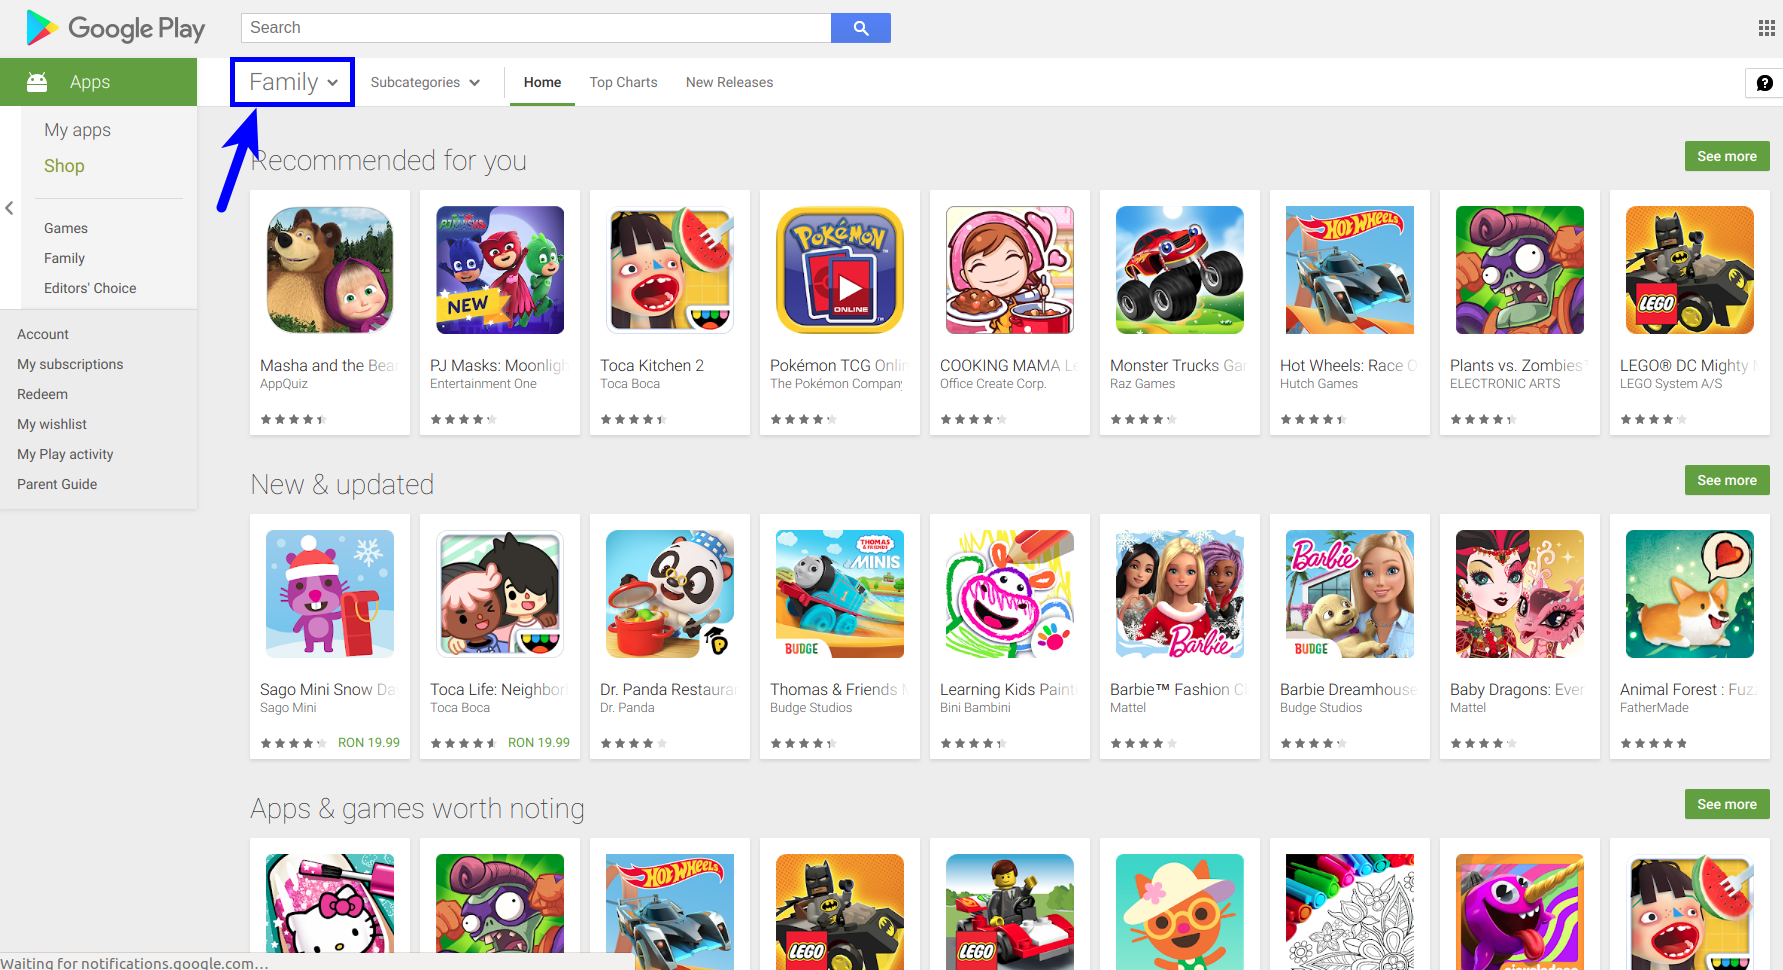


The next category after FAMILY and GAME is TOOLS category (about 9%). Generally it seems that a good number of apps are designed for practical purposes (family, tools, games, business, lifestyle, productivity, etc.)

One way to determine most popular apps is to compare the number of intalls for each app category. Let's use the information we have so far to determine the most popular app Category by Installs

# Most popular Category by Installs

In [662]:
installs_by_cat = (non_duplicates.groupby("Category")
    .mean().sort_values("Installs", ascending=False)["Installs"].astype(int))

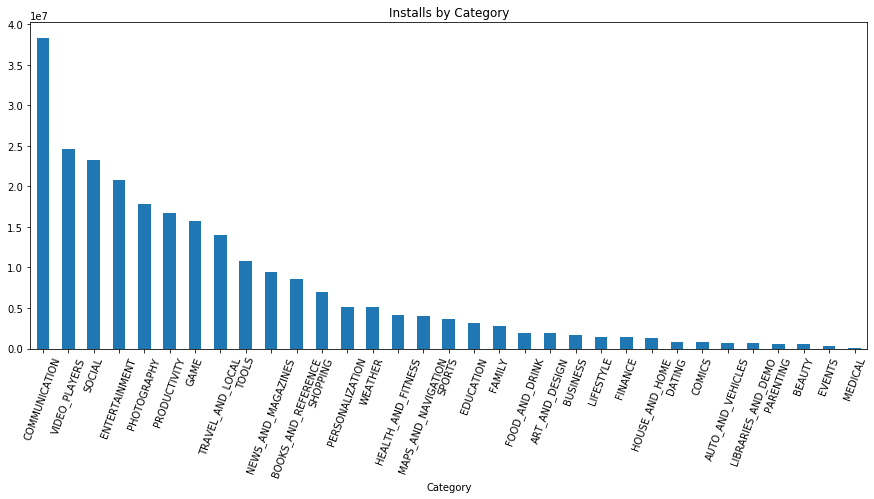

In [681]:
installs_by_cat.plot.bar(figsize=(15,6), rot="70", title="Installs by Category")

On average, communication apps have the most installs: 38,322,625. However, this number is heavily skewed up by a few apps that have over one billion installs. This makes sense because everything we do today revolves almost around communication. But it's important we found out which apps under Communication Category are skewing our data. Let's check this. 

In [682]:
non_duplicates.reset_index()
communication = non_duplicates[non_duplicates["Category"]=="COMMUNICATION"]
over_100_million_c = communication[communication["Installs"] > 100000000]
over_100_million_c

,App,Category,Reviews,Installs
336,WhatsApp Messenger,COMMUNICATION,69119316,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,56646578,1000000000
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,17714850,500000000
4676,Viber Messenger,COMMUNICATION,11335481,500000000
403,LINE: Free Calls & Messages,COMMUNICATION,10790289,500000000
4234,Skype - free IM & video calls,COMMUNICATION,10484169,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,9643041,1000000000
465,imo free video calls and chat,COMMUNICATION,4785988,500000000
451,Gmail,COMMUNICATION,4604483,1000000000
464,Hangouts,COMMUNICATION,3419513,1000000000


As expected, apps from the tech giants Facebook, Google and others have over 100 millon installs. This will skew our analysis to a greater extent. 

Let's check if this is the case for apps of all categories

In [688]:
#apps with over 100 million installs from all categories
over_100_million_all = non_duplicates[non_duplicates["Installs"] > 100000000]
over_100_million_all["App"].unique()

array(['Facebook', 'WhatsApp Messenger', 'Instagram',
       'Messenger – Text and Video Chat for Free',
       'Clean Master- Space Cleaner & Antivirus', 'Subway Surfers',
       'YouTube', 'Security Master - Antivirus, VPN, AppLock, Booster',
       'Candy Crush Saga', 'UC Browser - Fast Download Private & Secure',
       'Snapchat', 'My Talking Tom', 'Twitter', 'Viber Messenger',
       'Google Photos', 'LINE: Free Calls & Messages', 'Pou',
       'Skype - free IM & video calls', 'Google Chrome: Fast & Secure',
       'Maps - Navigate & Explore', 'Facebook Lite', 'Temple Run 2',
       'Google', 'SHAREit - Transfer & Share', 'Google Play Games',
       'MX Player', 'Google Translate', 'Google+',
       'imo free video calls and chat', 'Gmail', 'Hangouts',
       'Google Drive', 'Google Street View', 'Microsoft Word',
       'Google Duo - High Quality Video Calls', 'Dropbox',
       'Gboard - the Google Keyboard', 'Google Play Books',
       'Flipboard: News For Our Time', 'Google Pl

Apps by Facebook and Google are still dominating across various categories. Competing with any of these giants at the start of a new project is not the ideal. 
So let's exclude all apps with over a million installs and recalculate the average by install

In [690]:
non_duplicates.reindex()
over_a_million = non_duplicates[(non_duplicates["Installs"] > 1000000) 
                                & (non_duplicates["Installs"] < 100000000)] 

In [693]:
groupby_cat = (over_a_million.groupby("Category")
                     .mean().sort_values("Installs", ascending=False).astype(int))
groupby_cat["Installs"] 

Category
VIDEO_PLAYERS          18488372
PHOTOGRAPHY            17142857
WEATHER                15952380
GAME                   15182926
TOOLS                  15000000
PRODUCTIVITY           14855072
BUSINESS               13787878
ART_AND_DESIGN         13125000
SHOPPING               12761194
FAMILY                 12462121
COMMUNICATION          12361111
ENTERTAINMENT          12209302
SOCIAL                 11944444
SPORTS                 11666666
PERSONALIZATION        11637931
TRAVEL_AND_LOCAL       11000000
MAPS_AND_NAVIGATION    10185185
NEWS_AND_MAGAZINES      9264705
LIFESTYLE               8846153
HEALTH_AND_FITNESS      8703703
BOOKS_AND_REFERENCE     8392857
FINANCE                 8142857
LIBRARIES_AND_DEMO      8000000
DATING                  7857142
FOOD_AND_DRINK          7826086
HOUSE_AND_HOME          7777777
PARENTING               7500000
BEAUTY                  7500000
EDUCATION               7321428
AUTO_AND_VEHICLES       7000000
COMICS                  6000000

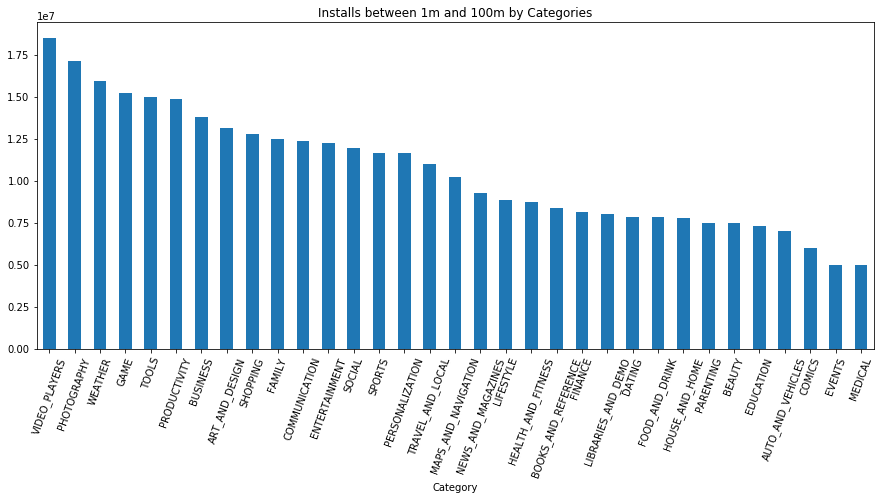

In [687]:
groupby_cat ["Installs"].plot.bar(figsize=(15,6), rot="70", title="Installs between 1m and 100m by Categories")

Our app is looking good now with the most installed being capped at around 18m installs (Photography Apps). The heavy skew caused by apps with over 100m installs have been reduced. While an app that has recorded a million install is way under, it shows a promising Category that could blossom in the future. Let's reduce our options further by selecting only apps with over a million installs and 100 million installs

To determine most sought after app among our apps, Reviews are very important. Feedbacks show users engagement with a product. It's important that users do not only install an app, but also interract with it. Reviews are the only credible proof that would demonstrate that an app was used. 

We Let's get our best performing category by reviews and installs.

In [671]:
groupby_cat.sort_values("Reviews", ascending=False)

,Reviews,Installs
Category,,
GAME,584248,15182926
WEATHER,549442,15952380
FAMILY,402617,12462121
SOCIAL,398044,11944444
SPORTS,397446,11666666
VIDEO_PLAYERS,392672,18488372
PHOTOGRAPHY,370532,17142857
COMICS,353985,6000000
PARENTING,338014,7500000


As we can see from the above, our apps have some number of reviews across all categories. To narrow down our search the more, let's select only app categories that are above the mean for Reviews and Installs categories

In [672]:
reviews_mean = groupby_cat["Reviews"].mean()
installs_mean = groupby_cat["Installs"].mean()
cat_over_average = (groupby_cat[(groupby_cat["Reviews"]>reviews_mean)
                               &(groupby_cat["Installs"]>installs_mean)].copy())

display(cat_over_average.shape[0])
cat_over_average.sort_values("Reviews", ascending=False)

12

,Reviews,Installs
Category,,
GAME,584248,15182926
WEATHER,549442,15952380
FAMILY,402617,12462121
SOCIAL,398044,11944444
SPORTS,397446,11666666
VIDEO_PLAYERS,392672,18488372
PHOTOGRAPHY,370532,17142857
SHOPPING,320889,12761194
COMMUNICATION,313202,12361111


We are left with 12 App Categories. Let's visualize this to get more understanding of our data.

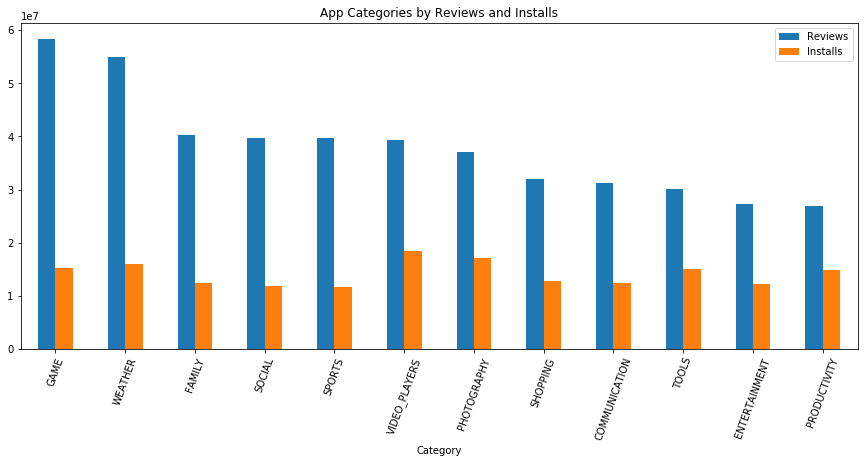

In [679]:
over_a_million.reset_index()
cat_over_average["Reviews"] = cat_over_average["Reviews"]*10
(cat_over_average.sort_values("Reviews", ascending=False)
.plot.bar(figsize=(15,6), rot="70", title="App Categories by Reviews and Installs"))

While apps from GAME category have the highest reviews, apps from Video_Players category recorded the highest installs. As both installs and reviews are important factors for the apps we are intending to build, we will need to also take both under consideration at this point. One way we could do this is to select the app category with the most reviews (GAME) and the app category with the highest installs (Video_Players). 

Let's examine apps in the two categories closely

In [674]:
game_apps = over_a_million[over_a_million["Category"] == "GAME"]
game_apps["Installs"].describe().astype(int)

count         328
mean     15182926
std      15630385
min       5000000
25%       5000000
50%      10000000
75%      10000000
max      50000000
Name: Installs, dtype: int64

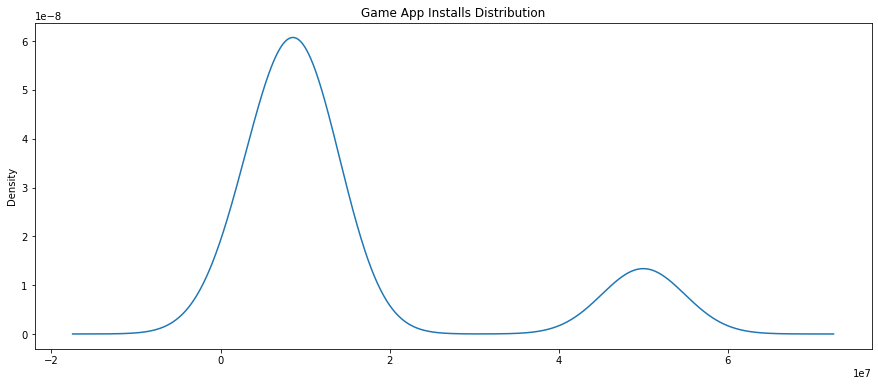

In [694]:
game_apps["Installs"].plot.kde(title="Game App Installs Distribution", figsize=(15,6))

75% of the Game Category Apps has installs of 10 million which is about 25 percent below the mean for Game categories. This might imply that a few apps (firms) have greater percentage of the Game Apps on Google Store. This also means opportunity for new market entrants. 

In [676]:
video_apps = over_a_million[over_a_million["Category"] == "VIDEO_PLAYERS"]
video_apps["Installs"].describe().astype(int)

count          43
mean     18488372
std      17645142
min       5000000
25%      10000000
50%      10000000
75%      10000000
max      50000000
Name: Installs, dtype: int64

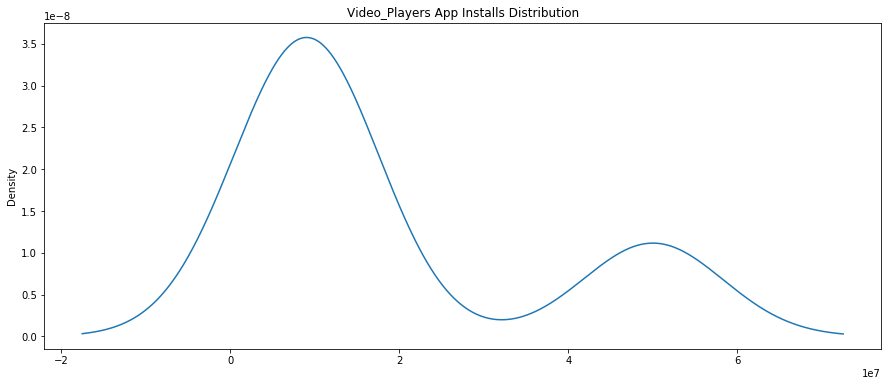

In [695]:
video_apps["Installs"].plot.kde(title="Video_Players App Installs Distribution",figsize=(15,6))

Just like the Game apps, the video_player apps are skewed to the right with the third percentile of the apps below the average installs by about 48 percent. This is also shows room for market entry opportunity.

# Conclusion

In this project, we analyzed app data from Google Play mobile apps with the goal of recommending a potential profitable app for the market.
We concluded that there are still good opportunity to be profitable with apps in Game and Video_Player categories. With a few apps in control of the apps market and with each of the apps recording installs over 10m on average, there is a need to apply great creativity and uniqueness while developing new apps to enable them break into the market. 